In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from word2number import w2n

In [2]:
df = pd.read_csv("hiring.csv")
df

experience  testscore  interviewscore  salary
0        NaN        8.0               9   50000
1        NaN        8.0               6   45000
2       five        6.0               7   60000
3        two       10.0              10   65000
4      seven        9.0               6   70000
5      three        7.0              10   62000
6        ten        NaN               7   72000
7     eleven        7.0               8   80000

In [3]:
import math
median_testscore = math.floor(df.testscore.median())
median_testscore

8

In [4]:
df.testscore = df.testscore.fillna(median_testscore)
df

experience  testscore  interviewscore  salary
0        NaN        8.0               9   50000
1        NaN        8.0               6   45000
2       five        6.0               7   60000
3        two       10.0              10   65000
4      seven        9.0               6   70000
5      three        7.0              10   62000
6        ten        8.0               7   72000
7     eleven        7.0               8   80000

In [5]:
df.experience = df.experience.fillna('zero')
df

experience  testscore  interviewscore  salary
0       zero        8.0               9   50000
1       zero        8.0               6   45000
2       five        6.0               7   60000
3        two       10.0              10   65000
4      seven        9.0               6   70000
5      three        7.0              10   62000
6        ten        8.0               7   72000
7     eleven        7.0               8   80000

In [6]:
df.experience = df.experience.apply(w2n.word_to_num)
df

experience  testscore  interviewscore  salary
0           0        8.0               9   50000
1           0        8.0               6   45000
2           5        6.0               7   60000
3           2       10.0              10   65000
4           7        9.0               6   70000
5           3        7.0              10   62000
6          10        8.0               7   72000
7          11        7.0               8   80000

In [7]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','testscore','interviewscore']],df.salary)

LinearRegression()

In [8]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [9]:
reg.intercept_

17737.26346433771

In [10]:
reg.predict([[8,5,6]])

array([62700.87336245])

In [11]:
reg.predict([[12,0,0]])

array([51492.72197962])

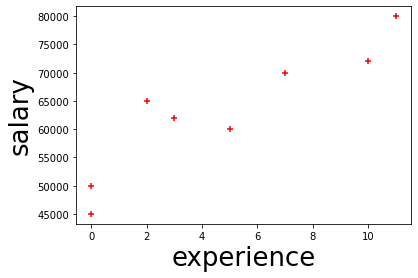

In [12]:
%matplotlib inline
plt.xlabel('experience',fontsize = 26)
plt.ylabel('salary',fontsize = 26)
plt.scatter(df.experience,df.salary , color= 'red' , marker = '+')

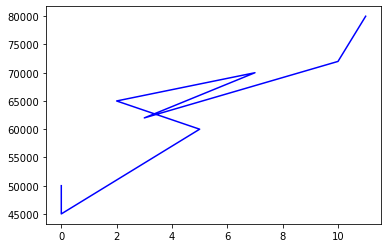

In [14]:
plt.plot(df.experience,df.salary,color ='blue')

In [15]:
reg1 = linear_model.LinearRegression()
reg1.fit(df[['experience']],df.salary)

LinearRegression()

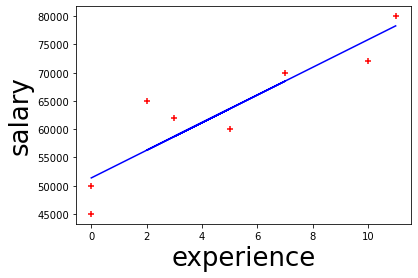

In [17]:
%matplotlib inline

plt.xlabel('experience',fontsize = 26)
plt.ylabel('salary', fontsize = 26)
plt.scatter(df.experience,df.salary, color='red',marker = '+')
plt.plot(df.experience,reg1.predict(df[['experience']]),color='blue')